# Scenario E - Peakshape Variation (pVoigt model - results evaluation)

This file is used to evaluate the inference results.

In this scenario the peakshape in a spectrum with a fixed number of peaks is varied from Gaussian (n = 0.0) to Lorentzian (n = 1.0). All datasets contain 3 peaks and the noise level is kept constant at 1%.

The model used in the inference of the parameters is formulated as follows:

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot f_{pseudo-Voigt}(x)\big] + \epsilon
\end{equation}

where:

\begin{equation}
\large f_{pseudo-Voigt}(x) = \eta \cdot \frac{\sigma_m^2}{(x-\mu_m)^2 + \sigma_m^2} + (1 - \eta) \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [2]:
# load results from disk
#fname = './scenario_peakshape_pvoigt.csv'
fname = './scenario_peakshape_pvoigt_lrun.csv'
df = pd.read_csv(fname)
df.index += 1
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,eta,eta_real,cat
1,1.780909,0.226636,104.363636,1.249257,0.999856,-4675.470979,0.049972,0.05,0.005661,0.0,1
2,1.000000,0.000000,4383.363636,1.029887,0.999035,-2331.742859,0.109758,0.05,0.000332,0.0,1
3,1.070909,0.049455,684.363636,1.014762,0.999820,-4207.406117,0.059134,0.05,0.000384,0.0,1
4,1.005455,0.003818,1720.727273,1.037991,0.999818,-4715.487126,0.050034,0.05,0.008271,0.0,1
5,1.000000,0.000727,2124.454545,1.044191,0.999872,-4726.544298,0.049924,0.05,0.001852,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
196,1.000000,0.000182,2297.909091,1.000964,0.999846,-4766.885947,0.049235,0.05,0.998066,1.0,5
197,1.450909,0.557818,1605.181818,1.008004,0.999950,-4836.525261,0.048113,0.05,0.999041,1.0,5
198,1.000000,0.000000,4905.090909,1.054635,0.999424,-2786.356407,0.094399,0.05,0.977116,1.0,5
199,1.000000,0.000000,3922.636364,0.997197,0.999916,-4743.426499,0.049649,0.05,0.999503,1.0,5


In [10]:
# number of succesfull convergences
suc = df.loc[(df['r_hat'] <= 1.1) & (df['r2'] >= 0.99)]
len(suc)

189

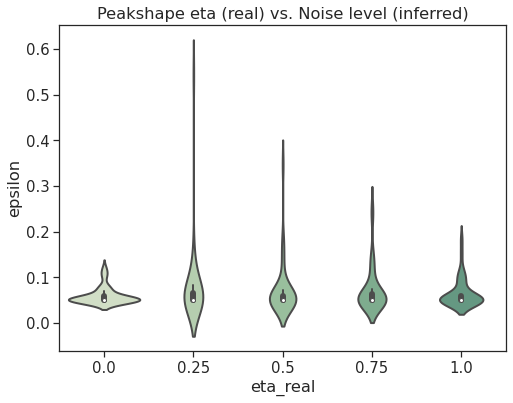

In [4]:
import seaborn as sns
sns.set(style="ticks", rc={'figure.figsize':(8,6)}, font_scale=1.35)

# color palette
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)

ax = sns.violinplot(x='eta_real', y='epsilon', data=suc, palette=pal, linewidth=2) \
                    .set_title("Peakshape eta (real) vs. Noise level (inferred)")

plt.savefig('violinplot_noise.png', dpi=150)

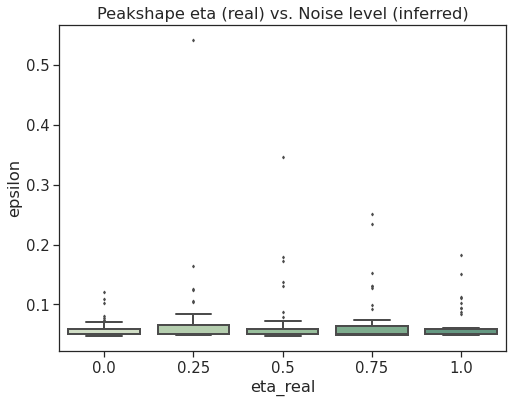

In [5]:
ax = sns.boxplot(x='eta_real', y='epsilon', data=suc, palette=pal, linewidth=2, fliersize=2) \
                    .set_title("Peakshape eta (real) vs. Noise level (inferred)")

plt.savefig('boxplot_noise.png', dpi=150)

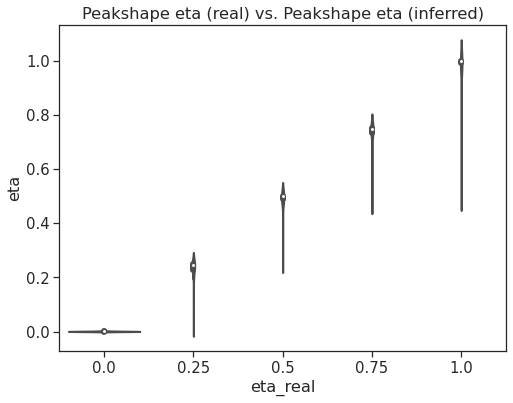

In [6]:
ax = sns.violinplot(x='eta_real', y='eta', data=suc, palette=pal, linewidth=2) \
                    .set_title("Peakshape eta (real) vs. Peakshape eta (inferred)")
plt.savefig('violinplot_peakshape.png', dpi=150)

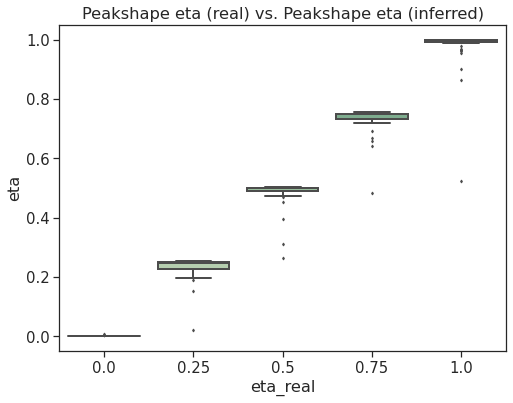

In [7]:
ax = sns.boxplot(x='eta_real', y='eta', data=suc, palette=pal, linewidth=2, fliersize=2) \
                    .set_title("Peakshape eta (real) vs. Peakshape eta (inferred)")

plt.savefig('boxplot_peakshape.png', dpi=150)

In [8]:
# table values
suc_000 = suc.loc[(suc['eta_real'] == 0.0)]
print("N = {0}".format(len(suc_000)))
suc_000['eta'].quantile([.25, .5, .75])

N = 35


0.25    0.000404
0.50    0.000938
0.75    0.001384
Name: eta, dtype: float64

In [9]:
suc_025 = suc.loc[(suc['eta_real'] == 0.25)]
print("N = {0}".format(len(suc_025)))
suc_025['eta'].quantile([.25, .5, .75])

N = 39


0.25    0.227337
0.50    0.246641
0.75    0.250805
Name: eta, dtype: float64

In [10]:
suc_050 = suc.loc[(suc['eta_real'] == 0.5)]
print("N = {0}".format(len(suc_050)))
suc_050['eta'].quantile([.25, .5, .75])

N = 39


0.25    0.489433
0.50    0.499222
0.75    0.500169
Name: eta, dtype: float64

In [11]:
suc_075 = suc.loc[(suc['eta_real'] == 0.75)]
print("N = {0}".format(len(suc_075)))
suc_075['eta'].quantile([.25, .5, .75])

N = 38


0.25    0.733126
0.50    0.748641
0.75    0.750410
Name: eta, dtype: float64

In [12]:
suc_100 = suc.loc[(suc['eta_real'] == 1.0)]
print("N = {0}".format(len(suc_100)))
suc_100['eta'].quantile([.25, .5, .75])

N = 38


0.25    0.990277
0.50    0.997331
0.75    0.998399
Name: eta, dtype: float64

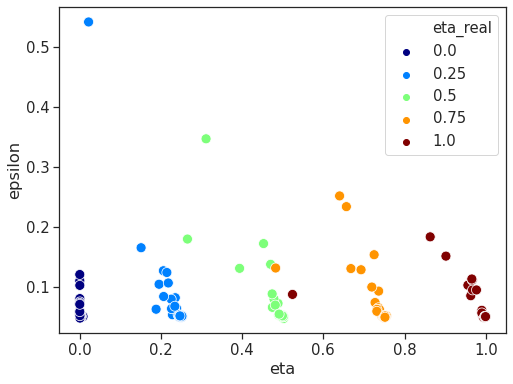

In [13]:
ax = sns.scatterplot(x="eta", y="epsilon", data=suc, hue="eta_real", s=100,
                     palette="jet", legend="full")
plt.savefig('scatterplot_noise_peakshape.png', dpi=150)

##  Statistics per peak shape factor

In [43]:
for i in [1,2,3,4,5]:
    cat = df.loc[(df['cat'] == i)]
    print('cat: {0} r-hat: {1:.2f}'.format(i, cat['r_hat'].mean()))
    print('cat: {0} r2   : {1:.4f}'.format(i, cat['r2'].mean()))
    print('cat: {0} waic : {1:.2f}'.format(i, cat['waic'].mean()))
    print('cat: {0} mcse : {1:.4f}'.format(i, cat['mcse'].mean()))
    print('cat: {0} ess  : {1:.1f}'.format(i, cat['ess'].mean()))
    print('cat: {0} bfmi : {1:.4f}'.format(i, cat['bfmi'].mean()))
    print('cat: {0} epsi : {1:.4f}'.format(i, cat['epsilon'].mean()))
    print('cat: {0} eta  : {1:.4f}'.format(i, cat['eta'].mean()))
    print('\n')

cat: 1 r-hat: 1.08
cat: 1 r2   : 0.9997
cat: 1 waic : -4342.65
cat: 1 mcse : 0.0823
cat: 1 ess  : 3298.4
cat: 1 bfmi : 1.0416
cat: 1 epsi : 0.0585
cat: 1 eta  : 0.0014


cat: 2 r-hat: 1.01
cat: 2 r2   : 0.9995
cat: 2 waic : -3972.92
cat: 2 mcse : 0.0267
cat: 2 ess  : 3879.6
cat: 2 bfmi : 1.0516
cat: 2 epsi : 0.0762
cat: 2 eta  : 0.2313


cat: 3 r-hat: 1.01
cat: 3 r2   : 0.9995
cat: 3 waic : -4069.55
cat: 3 mcse : 0.0199
cat: 3 ess  : 3676.4
cat: 3 bfmi : 1.0493
cat: 3 epsi : 0.0713
cat: 3 eta  : 0.4816


cat: 4 r-hat: 1.00
cat: 4 r2   : 0.9988
cat: 4 waic : -3637.68
cat: 4 mcse : 0.0039
cat: 4 ess  : 3647.7
cat: 4 bfmi : 1.0568
cat: 4 epsi : 0.0971
cat: 4 eta  : 0.7067


cat: 5 r-hat: 1.02
cat: 5 r2   : 0.9996
cat: 5 waic : -4145.78
cat: 5 mcse : 0.0217
cat: 5 ess  : 3287.5
cat: 5 bfmi : 1.0257
cat: 5 epsi : 0.0649
cat: 5 eta  : 0.9747


